In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Telco-Customer-Churn.csv')
pd.set_option('display.max_columns',100)
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
'''The TotalCharges is of type object because it has few blank values.So Change the value from ' ' to 0 '''
for i,j in enumerate(df['TotalCharges']):
    if j==' ':
       
        df['TotalCharges'][i]='0'
df['TotalCharges']=df['TotalCharges'].apply(lambda x:float(x))

In [5]:
df.sort_values('TotalCharges',ascending=False).head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4610,2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes
4586,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
6768,9739-JLPQJ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No
5347,9788-HNGUT,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.40,No
2187,8879-XUAHX,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No


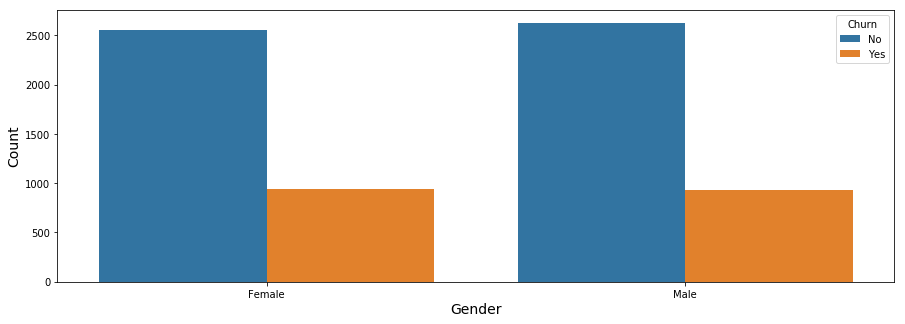

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['gender'],hue=df['Churn'])
plt.xlabel('Gender',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

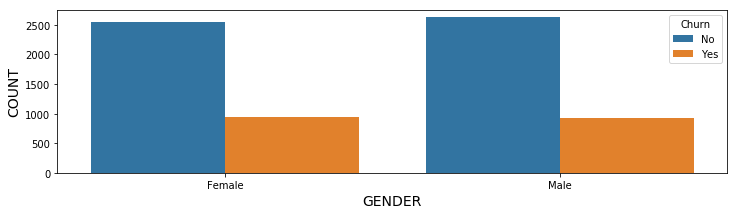

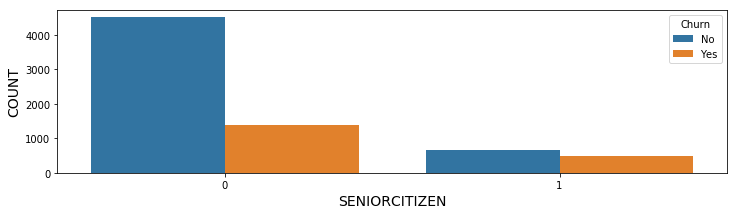

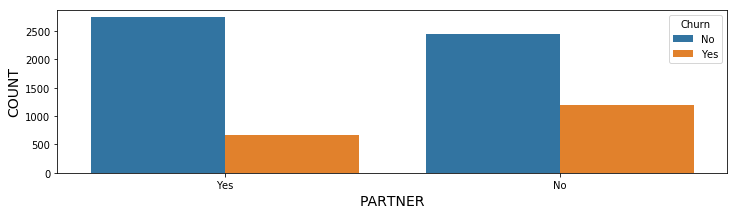

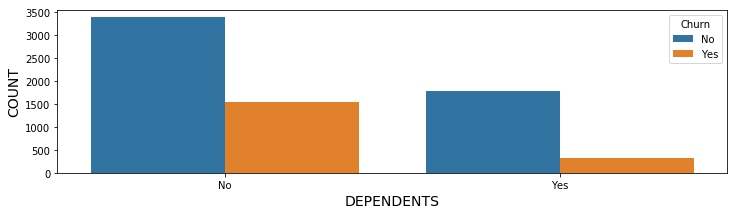

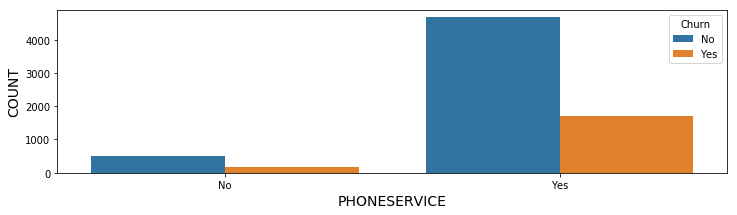

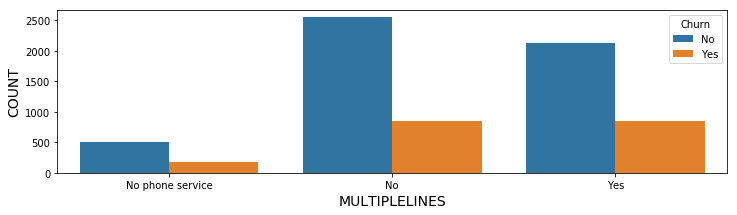

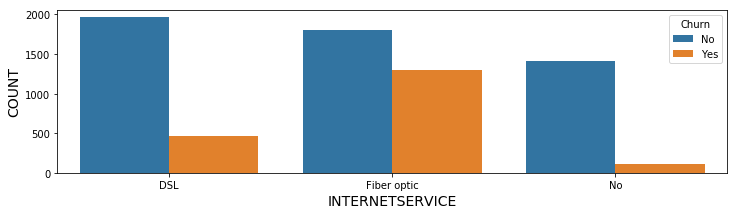

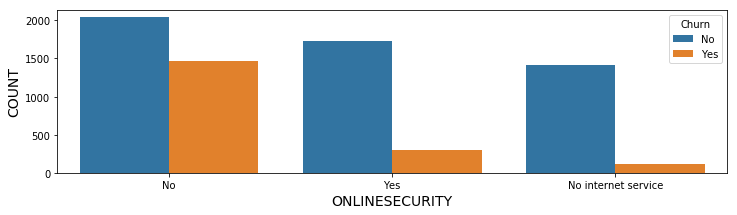

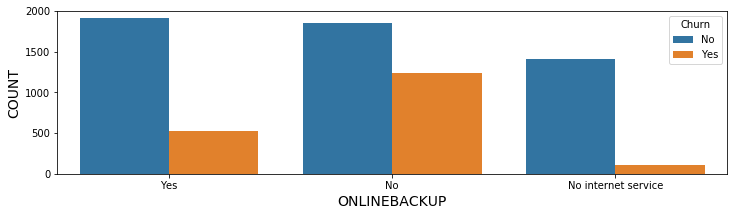

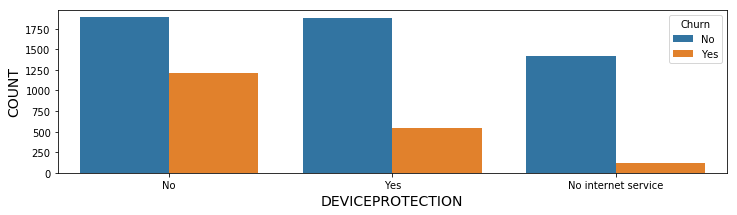

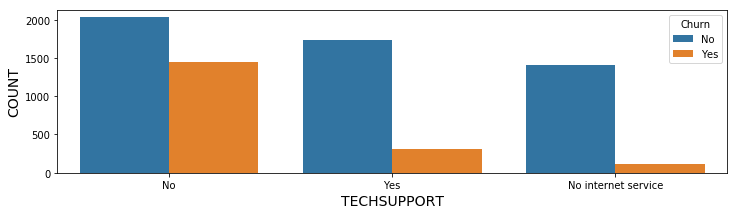

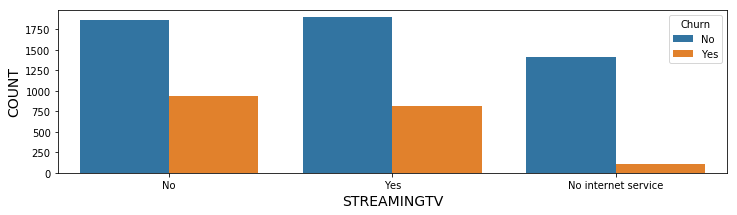

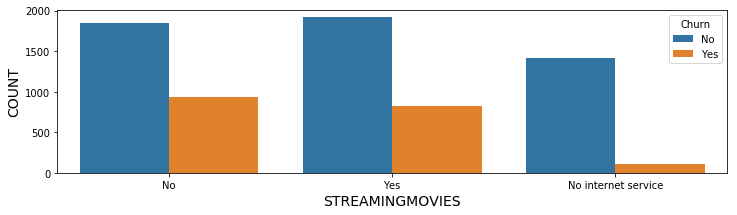

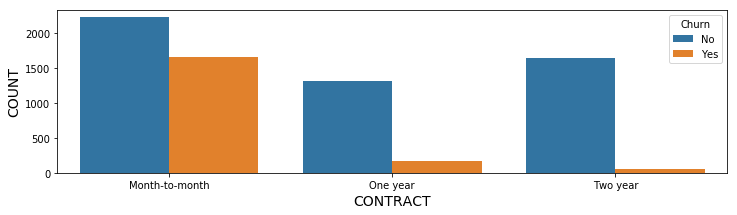

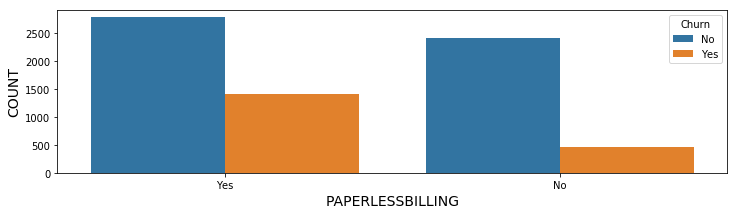

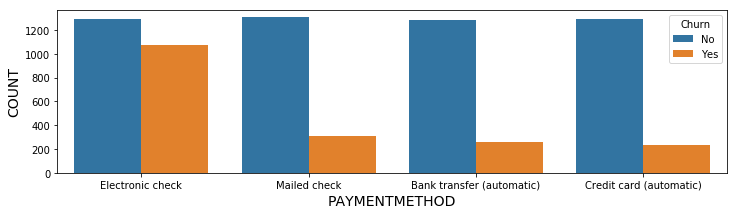

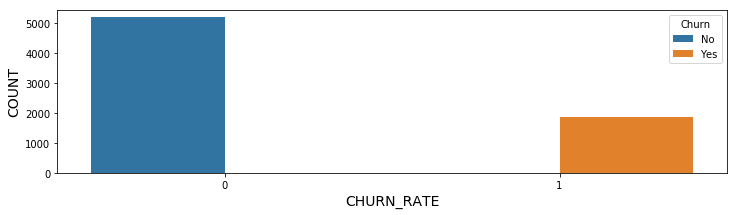

In [42]:
'''Function to create a count plot'''
def countplot(x,churn,columns):
    plt.figure(figsize=(12,3))
    ax=sns.countplot(x=x,hue=churn)
    plt.xlabel(i.upper(),fontsize=14)
    plt.ylabel('COUNT',fontsize=14)
    return ax


'''Plotting all the count plots who have less than 5 values in it and see if we have a correlation with the churn rate'''
churn=df['Churn']
for i in df.columns:
    if df[i].nunique()<5 and i!='Churn':
        countplot(df[i],churn,i)

Key Correlation of the Target Variable(Churning vs No Churning) with Different Feature Variables:

    1 -> Internet Service: Customer opting for fiber optic as the Internet Service are more likely to Churn. 
    2 -> Online Security: Customer with No Online Security are more likely to Churn.
    3 -> Online Backup: Customer with No Online BackUp are more likely to Churn.
    4 -> Device Protection: Customer with No Device Protection are more likely to Churn.
    5 -> Tech Support: Customer with No Tech Support are more likely to Churn.
    6 -> Contract: Customer with Month to Month Contract are more likely to Churn.
    7 -> PaperLess Billing: Customer with PaperLess Billing are more likely to Churn.
    
We see Streaming Movies and Streaming TV also have a lot of Customer's Churning but we cannot see any correlation yet because of the proportion of leaving whether they have that service or not is the same.I am guessing it might be because of the Price. We will explore more in detail later on and see if we can find any correlation.    

# Feature Engineering

In [ ]:
                '''Creating the bin for the tenure column to see how it is related with churning''' 
    
def bins(x):
    if x<11:
        return 'Tenure 0_10'
    elif x<25:
        return 'Tenure 11_24'
    elif x<49:
        return 'Tenure 24_48'
    elif x<61:
        return 'Tenure 48_60'
    else:
        return 'Tenure gt 60'
df['tenurebin']=df['tenure'].apply(lambda x:bins(x))  

In [54]:
                                    '''Calculating Total Services '''
    
totalservice=df[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]
TotalService=[]
for i in range(0,len(totalservice)):
    service=0
    for j in range(0,len(totalservice.iloc[1])):
        if totalservice.iloc[i][j]=='Yes':
            service=service+1
    TotalService.append(service)
df['TotalService']=TotalService     

# Functions


In [276]:
def scatterplot(feature,hue):
    f = sns.FacetGrid(df,hue=hue,aspect=2,size=4)
    f.map(plt.scatter,feature,"tenure")
    plt.xlabel(feature,fontsize=12)
    plt.ylabel('Tenure',fontsize=12)
    plt.title("{} vs Tenure".format(feature),fontsize=16)
    plt.show()
    
#------------------------------------------------------------------------------------------------------------------
def box(x,y,data,hue=None):
    plt.figure(figsize=(15,4))
    sns.boxplot(x=x,y=y,data=data,hue=hue)
    plt.tight_layout()
    
#------------------------------------------------------------------------------------------------------------------    
'''TEXT LABEL ON BOX PLOT'''
def boxlabel(x,y,df):
    
    plt.figure(figsize=(15,4))
    ax = sns.boxplot(x=x,y=y,data=df)
    ax.set_xlabel(x.upper(),fontsize=14)
    ax.set_ylabel(y.upper(),fontsize=14)

    # Calculate number of obs per group & median to position labels
    medians = df.groupby([x])[y].median().values
    nobs = df[x].value_counts().values
    nobs = [str(x) for x in nobs.tolist()]
    nobs = ["n: " + i for i in nobs]

    # Add it to the plot
    pos = range(len(nobs))
    for tick,label in zip(pos,ax.get_xticklabels()):
        ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],fontsize=14,horizontalalignment='center',
             verticalalignment='center',bbox=dict(facecolor='black', alpha=0.5),color='w')
    plt.show()
    
#------------------------------------------------------------------------------------------------------------------        
def barmeanlabel(x,y,df):
    plt.figure(figsize=(15,4))

    
    ax=df.groupby(x)[y].mean().plot(kind='bar')
    plt.title('Mean of {} for {} taken'.format(y,x),fontsize=14)
    for i in ax.patches:
        x,y=i.xy
        w=i.get_width()
        h=i.get_height()
        plt.text(x=x+w/2,y=h.max()*1/2,s=int(h),fontsize=10,horizontalalignment='center',verticalalignment='center',bbox=dict(facecolor='w', alpha=0.5))

#------------------------------------------------------------------------------------------------------------------
def barcountlabel(x,y,df):
    plt.figure(figsize=(15,4))
    ax=df.groupby(x)[y].count().plot(kind='bar')
    plt.title('Count of {}'.format(x),fontsize=14)
    for i in ax.patches:
        x,y=i.xy
        w=i.get_width()
        h=i.get_height()
        plt.text(x=x+w/2,y=h.max()*1/2,s=int(h),fontsize=10,horizontalalignment='center',verticalalignment='center',bbox=dict(facecolor='w', alpha=0.5))
#------------------------------------------------------------------------------------------------------------------    



# 1 -: Lets first see the Tenure Feature

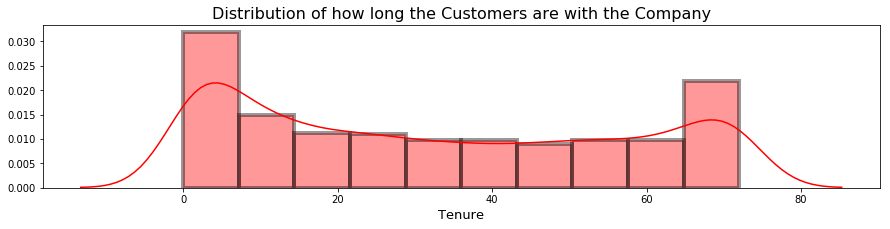

In [45]:
                '''Distribution of how long the customers are with the telecom company'''
plt.figure(figsize=(15,3))
sns.distplot(df['tenure'],bins=10,color='red',hist_kws=dict(edgecolor="k",linewidth=4))
plt.xlabel('Tenure',fontsize=13)
plt.title('Distribution of how long the Customers are with the Company',fontsize=16)
plt.show()

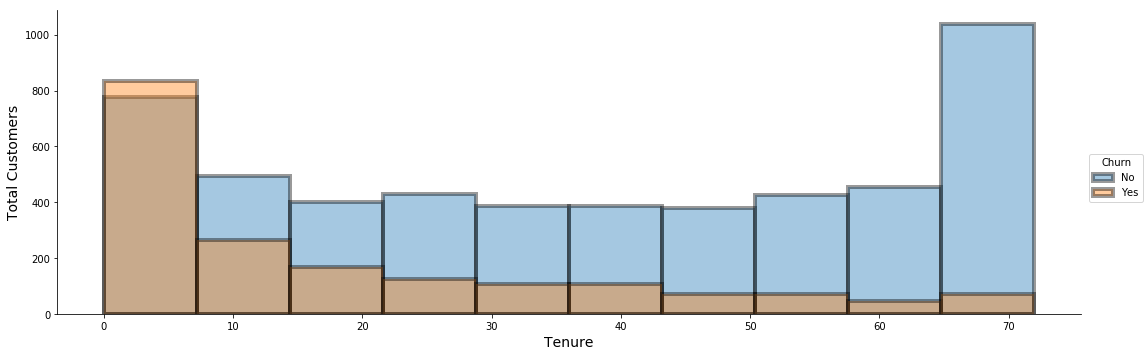

In [48]:
_,bins = np.histogram(df["tenure"])
g = sns.FacetGrid(df,hue="Churn",sharex=True,sharey=True,size=5,aspect=3)
g = g.map(sns.distplot, "tenure", bins=bins,kde=False,hist_kws=dict(edgecolor="k",linewidth=4))
g.add_legend()
g.set_titles('Churning vs Non Churning of the Customers based on their Tenure')
g.set_xlabels('Tenure',fontsize=14)
g.set_ylabels('Total Customers',fontsize=14)
plt.show()

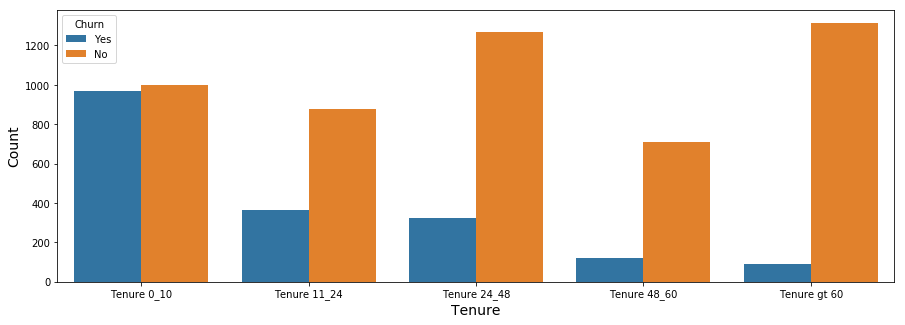

In [63]:
                                                    '''Another Way:'''

plt.figure(figsize=(15,5))
sns.countplot(df['tenurebin'],hue=churn,order=['Tenure 0_10','Tenure 11_24','Tenure 24_48','Tenure 48_60','Tenure gt 60'],
              hue_order=['Yes','No'])
plt.xlabel('Tenure',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

We see more customers churn in the first 10 months than they stay.People who stays for a longer period of time are less likely to leave the service.Lets see why Customers are disatisfied and leaving in the first few months.

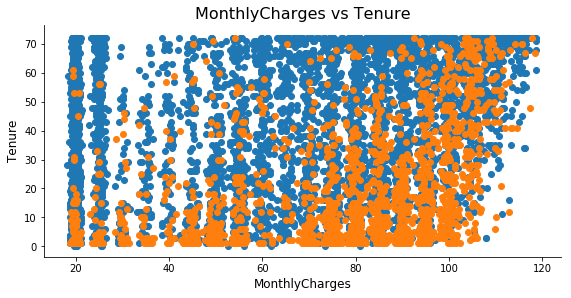

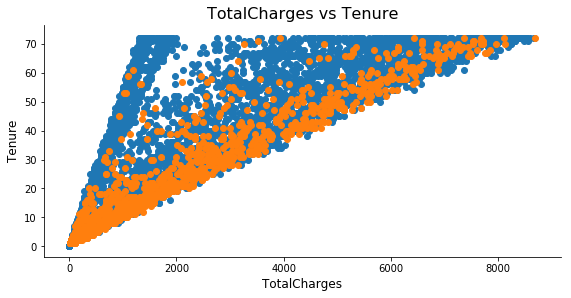

In [247]:
scatterplot('MonthlyCharges','Churn')
scatterplot('TotalCharges','Churn')

    We do see a correlation:
    MonthlyCharges: Higher the MonthlyCharge more is the probability of churn.
    TotalCharges: As tenure increases,if the TotalCharge value is greater than a threshold then it has higher chance of a     churn.
    

In [80]:
print('                         Count of Customers for each Tenure                     ')
print('                       ----------------------------------------')
print(df.groupby('tenurebin')['customerID'].count())
print(' ')
print(' ')
print(' ')
print('                         Count of Churning vs Not Churning for each Tenure                                 ')
print('                       --------------------------------------------------')
print(df.groupby(['tenurebin','Churn'])['customerID'].count())

                         Count of Customers for each Tenure                     
                       ----------------------------------------
tenurebin
Tenure 0_10     1970
Tenure 11_24    1240
Tenure 24_48    1594
Tenure 48_60     832
Tenure gt 60    1407
Name: customerID, dtype: int64
 
 
 
                         Count of Churning vs Not Churning for a Tenure                                 
                       --------------------------------------------------
tenurebin     Churn
Tenure 0_10   No       1002
              Yes       968
Tenure 11_24  No        877
              Yes       363
Tenure 24_48  No       1269
              Yes       325
Tenure 48_60  No        712
              Yes       120
Tenure gt 60  No       1314
              Yes        93
Name: customerID, dtype: int64


Tenure 0 to 10 months have Most number of Customers and also the churning rate is the most for them.So lets explore only that tenure seperately. 

# Tenure less than 12 Months

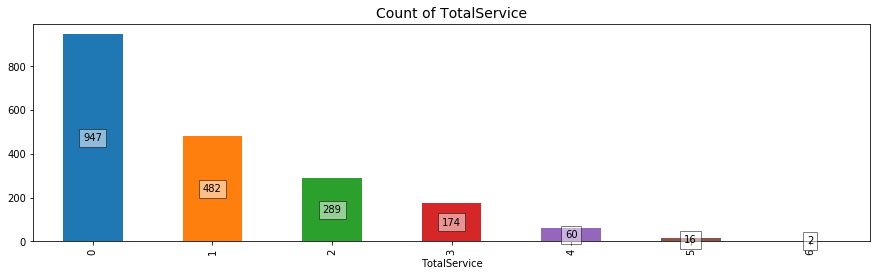

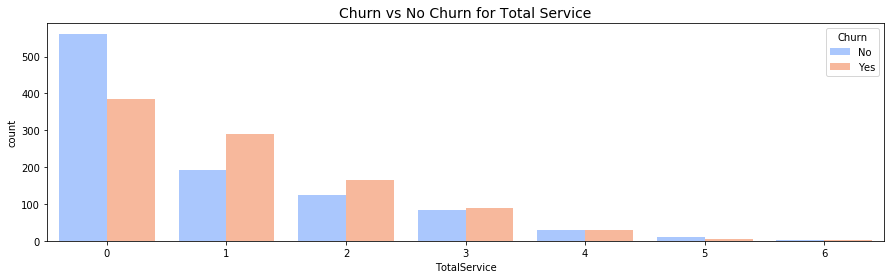

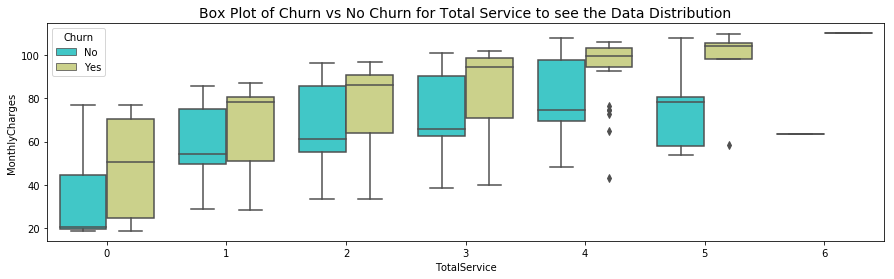

In [278]:
df_tenure_lsthan_11=df[df['tenure']<11]

barcountlabel(x='TotalService',y='MonthlyCharges',df=df_tenure_lsthan_11)

plt.figure(figsize=(15,4))
sns.countplot(x='TotalService',data=df_tenure_lsthan_11,hue="Churn",palette='coolwarm',saturation=1.5)
plt.title('Churn vs No Churn for Total Service',fontsize=14)
plt.show()

plt.figure(figsize=(15,4))
sns.boxplot(x='TotalService',y='MonthlyCharges',data=df_tenure_lsthan_11,hue="Churn",palette='rainbow')
plt.title('Box Plot of Churn vs No Churn for Total Service to see the Data Distribution',fontsize=14)
plt.show()

50% of Customers have either 1 or No services taken.Also we observe that the Customers who are  leaving is much more than those who are staying for 0 and 1 services the reason for is for same number of services they were paying more.
But there can be few services that are more costlier and hence they ended up paying more or there can be other features that might have increased their Monthly Charges.

But right now from the graphs we can conclude paying more monthly charges is strongly correlated with customers to leave.

In [110]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenurebin,churn_rate,TotalService
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure 0_10,0,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure 24_48,0,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure 0_10,1,2
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure 24_48,0,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure 0_10,1,0


# Find if any service is more expensive than other

In [238]:
            '''Trying to find the Average Charges based on the Number of Services taken'''
    
df_totalservicecharge=df[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                          'StreamingTV','StreamingMovies','TotalService','MonthlyCharges']]

df_totalservicecharge['ChargesperService']=df_totalservicecharge[['MonthlyCharges','TotalService']].apply(lambda x:x[0]/x[1] if x[1]>0 else x[0],axis=1)

In [ ]:
'''Dropping rows that have Total Service=0 and Online Backup= No internet service(Others columns will also have no internet if one column has that value )'''

df_totalservicecharge=df_totalservicecharge.drop(df_totalservicecharge[(df_totalservicecharge['TotalService']==0) & (df_totalservicecharge['OnlineBackup']=='No internet service')].index)
df_totalservicecharge.head()

In [243]:
for cols in totalservice.columns:
    print(cols,':',df_totalservicecharge[df_totalservicecharge['TotalService']==1].groupby(cols)['MonthlyCharges'].mean()['Yes'],',',df_totalservicecharge[df_totalservicecharge['TotalService']==1].groupby(cols)['MonthlyCharges'].count()['Yes'])

OnlineSecurity : 58.96971428571425 , 175
OnlineBackup : 62.46459330143541 , 209
DeviceProtection : 64.86008064516128 , 124
TechSupport : 53.8637254901961 , 102
StreamingTV : 74.4652046783626 , 171
StreamingMovies : 74.05216216216209 , 185


StreamingTV and StreamingMovies are a bit expensive around 10-15 dollars more.This is when a customer is enrolled to only 1 service as this is the best way to find which services are expensive.

In [245]:
'''The other way we can check is by considering the average charges i.e if they are enrolled in 3 services we can divide MonthlyCharge by 3 just to get the estimation'''

for cols in totalservice.columns:
    print('Mean of {} when the service is selected'.format(cols),df_totalservicecharge.groupby(cols)['ChargesperService'].mean()['Yes'])
    print('Count of {} when the service is selected'.format(cols),df_totalservicecharge.groupby(cols)['ChargesperService'].count()['Yes'])
    print('Sum of {} when the service is selected'.format(cols),df_totalservicecharge.groupby(cols)['ChargesperService'].sum()['Yes'])
    print(' ')
    

Mean of OnlineSecurity when the service is selected 25.100907214792777
Count of OnlineSecurity when the service is selected 2019
Sum of OnlineSecurity when the service is selected 50678.731666666616
 
Mean of OnlineBackup when the service is selected 27.07810038424589
Count of OnlineBackup when the service is selected 2429
Sum of OnlineBackup when the service is selected 65772.70583333327
 
Mean of DeviceProtection when the service is selected 25.528429672446997
Count of DeviceProtection when the service is selected 2422
Sum of DeviceProtection when the service is selected 61829.85666666663
 
Mean of TechSupport when the service is selected 23.25512067840832
Count of TechSupport when the service is selected 2044
Sum of TechSupport when the service is selected 47533.46666666661
 
Mean of StreamingTV when the service is selected 28.954234084472365
Count of StreamingTV when the service is selected 2707
Sum of StreamingTV when the service is selected 78379.1116666667
 
Mean of StreamingMov

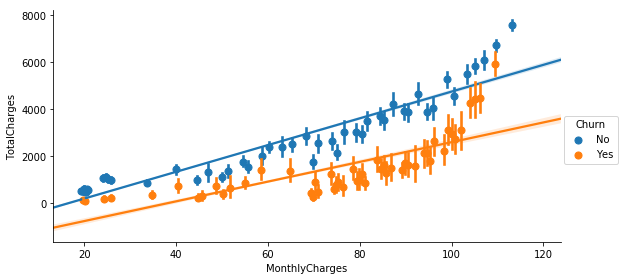

In [12]:
sns.lmplot(x="MonthlyCharges",y="TotalCharges",data=df,hue="Churn",size=4,aspect=2,x_bins=50,legend_out=True)

One of the major reason for people leaving the telecom service is the high Monthly Charge.

In [16]:
g=df.groupby('SeniorCitizen')['Churn'].value_counts().to_frame()
g

Churn
SeniorCitizen Churn       
0             No      4508
              Yes     1393
1             No       666
              Yes      476

In [17]:
 g = g.rename({"Churn": "percentage of customers"}, axis=1).reset_index()
g

,SeniorCitizen,Churn,percentage of customers
0,0,No,4508
1,0,Yes,1393
2,1,No,666
3,1,Yes,476


In [105]:
"""df['churn_rate'] = df['Churn'].replace("No", 0).replace("Yes", 1)
df['churn_rate']"""

'df[\'churn_rate\'] = df[\'Churn\'].replace("No", 0).replace("Yes", 1)\ndf[\'churn_rate\']'

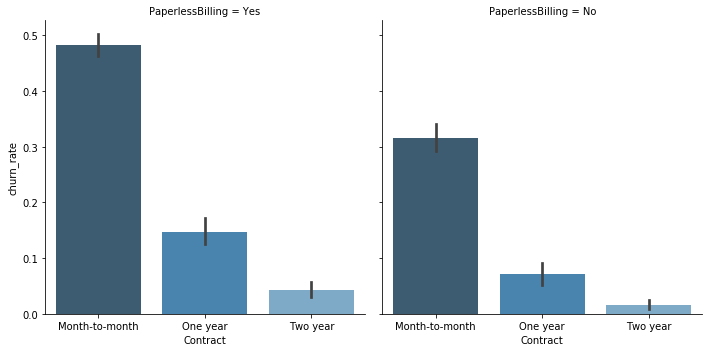

In [19]:
g = sns.FacetGrid(df, col="PaperlessBilling", aspect=1,size=5)
ax = g.map(sns.barplot, "Contract","churn_rate", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])

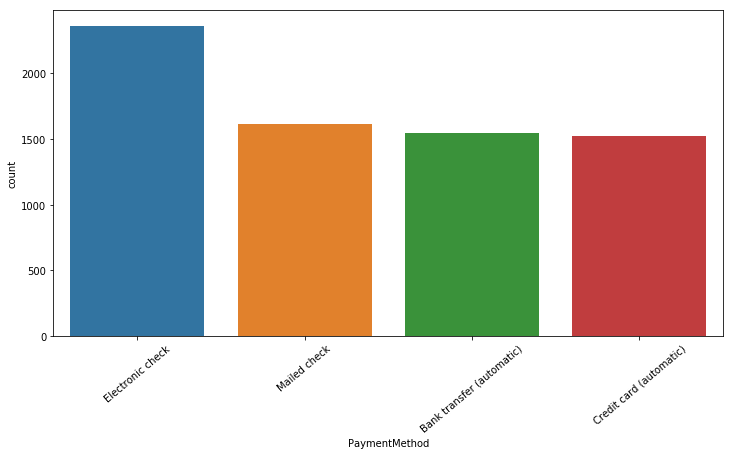

In [20]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x='PaymentMethod',data=df)
ax.set_xticklabels(labels=df['PaymentMethod'].unique(),rotation=40)
plt.show()

In [21]:
df.count()['SeniorCitizen']

7043

In [22]:
seniorcitizen=df[df['SeniorCitizen']==1].count()['SeniorCitizen']
nonseniorcitizen=df[df['SeniorCitizen']==0].count()['SeniorCitizen']
churnseniorcitizen=df[(df['SeniorCitizen']==1) & (df['Churn']=='Yes')].count()['SeniorCitizen']
churnnonseniorcitizen=df[(df['SeniorCitizen']==0) & (df['Churn']=='Yes')].count()['SeniorCitizen']

In [23]:
b=[churnseniorcitizen/seniorcitizen,churnnonseniorcitizen/nonseniorcitizen]
b

[0.4168126094570928, 0.23606168446026096]

In [24]:
df[(df['SeniorCitizen']==1) & (df['Churn']==1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenurebin,churn_rate


In [25]:
'''
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)

(df[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport',
       'StreamingTV', 'OnlineBackup']] == 'Yes').sum(axis=1)

'''

'\ntelcom[\'TotalCharges\'] = telcom["TotalCharges"].replace(" ",np.nan)\n\n(df[[\'OnlineSecurity\', \'DeviceProtection\', \'StreamingMovies\', \'TechSupport\',\n       \'StreamingTV\', \'OnlineBackup\']] == \'Yes\').sum(axis=1)\n\n'

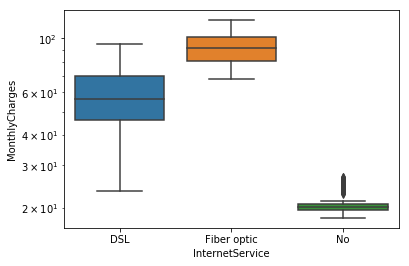

In [26]:
ax=sns.boxplot(x='InternetService',y='MonthlyCharges',data=df)
plt.yscale('log')

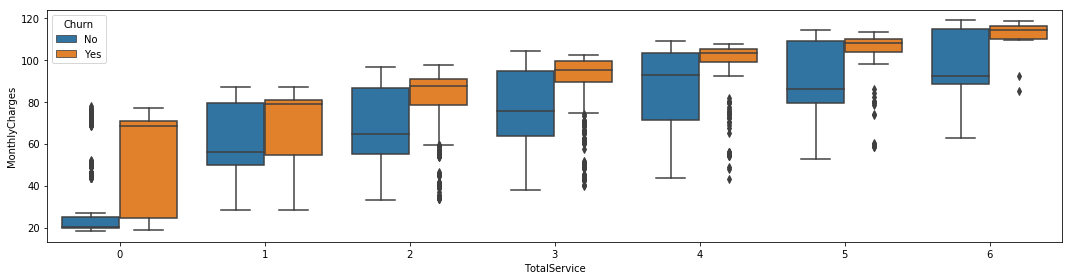

In [28]:
box(x='TotalService',y='MonthlyCharges',data=df,hue='Churn')

We observe as number of services increases the Monthly Charges also increases.One of the reason we observe why customers are churning is because they pay more than customers having the same services.
Customers with 0 services and paying less than 25 are more likely to stay with us then those paying more than $50.

So why there is so much of a difference when they have enrolled for same services.Lets try to check that

In [246]:
print('-----------------------------Mean Monthly Charge of the Customers when the Internet Service is Fibre Optics---------------------')

print(a.groupby(['TotalService','Churn'])['MonthlyCharges'].mean())
print('')
print('-----------------------------Mean Monthly Charges-----------------------------')
print(df.groupby(['TotalService','Churn'])['MonthlyCharges'].mean())
print('------------------------------------------------------------------------------')
print('-----------------------------Total Count of the Customers when the Internet Service is Fibre Optics--------------------')
print('')
print(a.groupby(['TotalService','Churn'])['MonthlyCharges'].count())
print('')
print('-----------------------------Total Count-----------------------------')
print(df.groupby(['TotalService','Churn'])['MonthlyCharges'].count())

-----------------------------Mean Monthly Charge of the Customers when the Internet Service is Fibre Optics---------------------


KeyError: 'Churn'

We cannot conclude from More Mnthly charge as the reason for people to churn when internet service is Fibre Optics.We observe customers paying $100 as Monthly Charges but still stay with the company.

We observe that customers which are paying more but have less services are more likely to churn when the internet service is Fibre Optics.


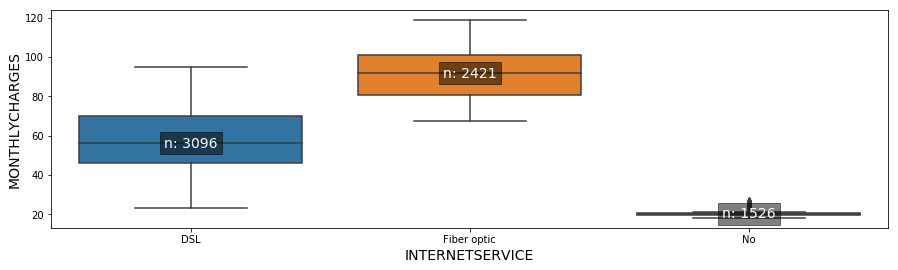

In [104]:
boxlabel(x='InternetService', y='MonthlyCharges', df=df)

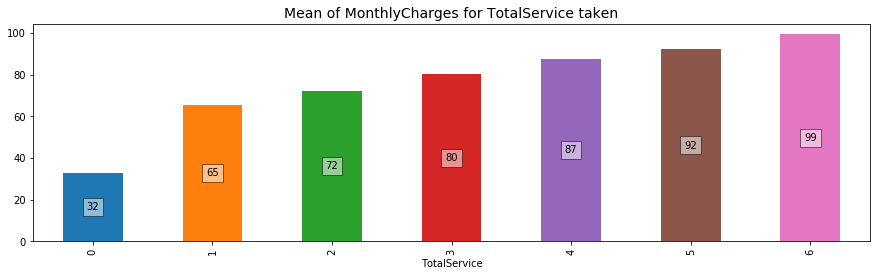

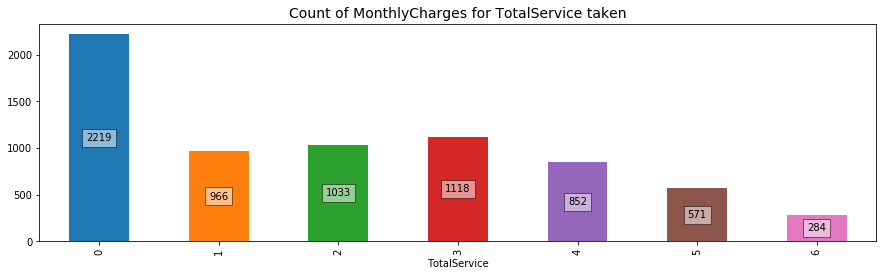

In [96]:
barmeanlabel(x='TotalService',y='MonthlyCharges',df=df)
barcountlabel(x='TotalService',y='MonthlyCharges',df=df)

In [ ]:
'''Just for Practice : Another way of visualizing'''

techsupport=df['TechSupport'].value_counts()
labels=df['TechSupport'].unique()
plt.pie(x=techsupport,radius=1,labels=labels,shadow=True,autopct='%1.1f%%',startangle=90,explode=(0.05,0.05,0.05))
plt.show()